In [1]:
# Stock Prediction using LSTM

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error

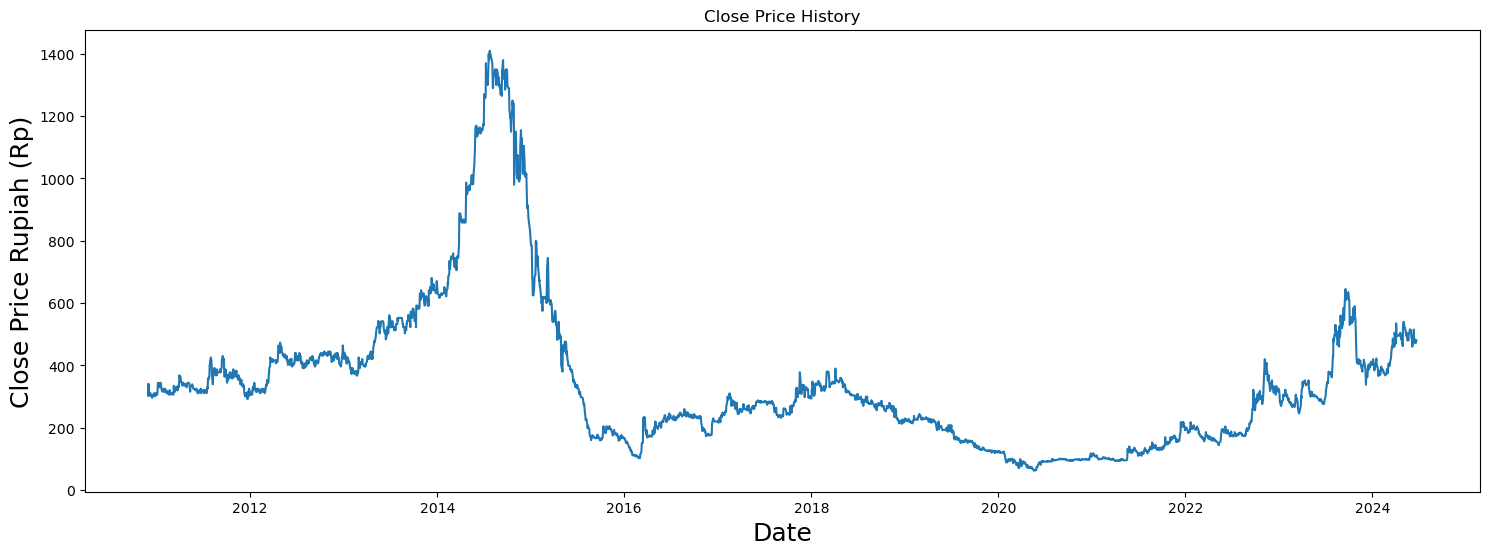

In [2]:
# Get the stock data
stock = yf.Ticker("WINS.JK")
df = stock.history(period="14y")
df = df[['Close']]
df = df.dropna()

# Plot the stock data
plt.figure(figsize=(18, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.show()

In [3]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

In [4]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [5]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(400, len(train_data)):
    x_train.append(train_data[i-400:i, 0])
    y_train.append(train_data[i, 0])
    
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 400, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 400, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=1)

2276/2276 [==============================] - 511s 223ms/step - loss: 0.0025


In [8]:
# Create the testing data set
test_data = scaled_data[training_data_len - 400:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(400, len(test_data)):
    x_test.append(test_data[i-400:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [9]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 4s 123ms/step


In [10]:
# Get the MSE and root mean squared error (RMSR)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('RMSE:', rmse)

MSE: 1374.5349670099858
RMSE: 30.987574943690735


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\3252780068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


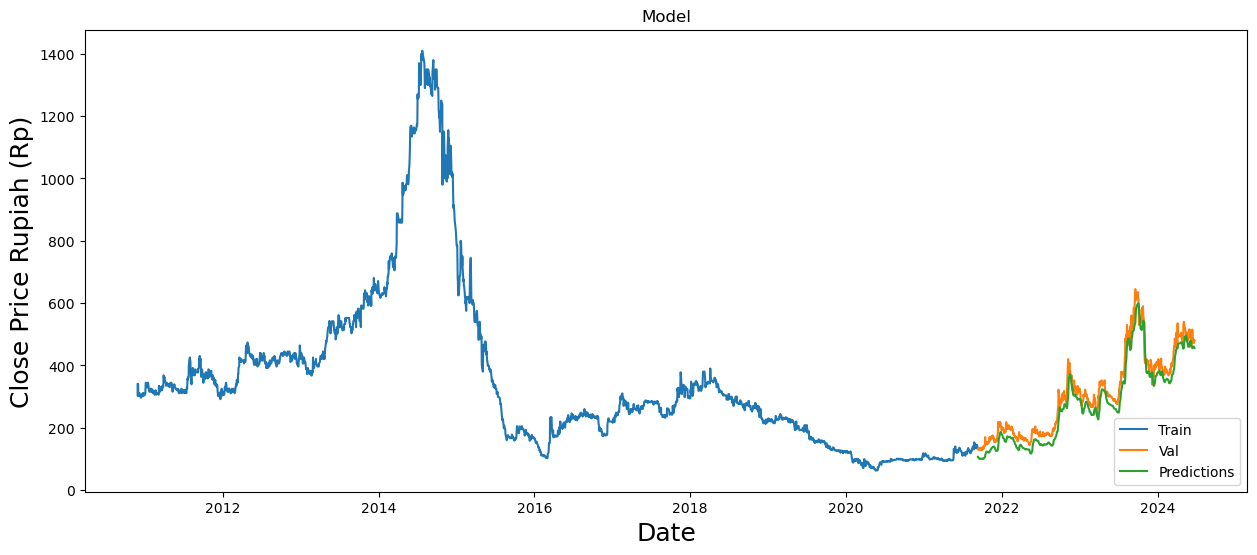

In [11]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(15, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
# Show the valid and predicted prices
print(valid)

                           Close  Predictions
Date                                         
2021-09-10 00:00:00+07:00  131.0   106.595512
2021-09-13 00:00:00+07:00  129.0   104.836060
2021-09-14 00:00:00+07:00  135.0   102.681458
2021-09-15 00:00:00+07:00  133.0   101.514252
2021-09-16 00:00:00+07:00  135.0   100.761414
...                          ...          ...
2024-06-13 00:00:00+07:00  486.0   459.164337
2024-06-14 00:00:00+07:00  484.0   460.024017
2024-06-19 00:00:00+07:00  472.0   459.961243
2024-06-20 00:00:00+07:00  482.0   457.643372
2024-06-21 00:00:00+07:00  480.0   455.988007

[669 rows x 2 columns]


In [ ]:
# # Predict the next day's price
# last_30_days = data[-30:].values
# last_30_days_scaled = scaler.transform(last_30_days)
# X_test = []
# X_test.append(last_30_days_scaled)
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# pred_price = model.predict(X_test)
# pred_price = scaler.inverse_transform(pred_price)
# print('Predicted Price:', pred_price)

1/1 [==============================] - 0s 51ms/step
Predicted Price: [[123.388985]]


In [13]:
predict = []

for i in range(30):
    last_30_days = data[-30:].values
    last_30_days_scaled = scaler.transform(last_30_days)
    X_test = []
    X_test.append(last_30_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred_price = model.predict(X_test)
    pred_price = scaler.inverse_transform(pred_price)
    predict.append(pred_price)
    data = data.append({'Close': pred_price[0][0]}, ignore_index=True)

1/1 [==============================] - 0s 32ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - ETA: 0s

C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 37ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 34ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 32ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 41ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 36ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


1/1 [==============================] - 0s 38ms/step


C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)
C:\Users\Galan\AppData\Local\Temp\ipykernel_20888\2754600877.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'Close': pred_price[0][0]}, ignore_index=True)


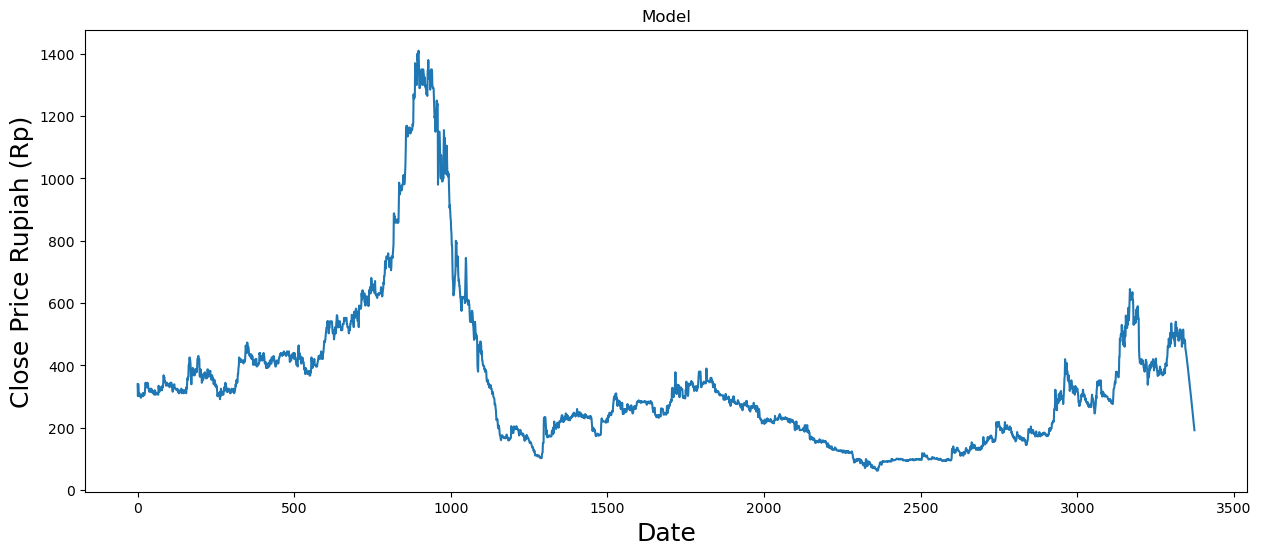

In [14]:
# Plot the data
plt.figure(figsize=(15, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(data['Close'])
plt.show()